In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pvanalysis import PVAnalysis
import os


# PV_Analysis Ophiucus 1


## 12CO

### Mean method/ Velocidad acotada

read_pvfits: Input P.A.: 51.3 deg
read_pvfits: Convert frequency to velocity
Along position axis.
x range: -2.63 -- -0.03 arcsec
v range: -3.60 -- 2.20 km/s
Along velocity axis.
x range: -2.63 -- -0.03 arcsec
v range: -3.60 -- 2.20 km/s
Derived points in pvanalysis_Oph1_12CO_mTTT_tr3_vlim_1.edge.dat and pvanalysis_Oph1_12CO_mTTT_tr3_vlim_1.ridge.dat.


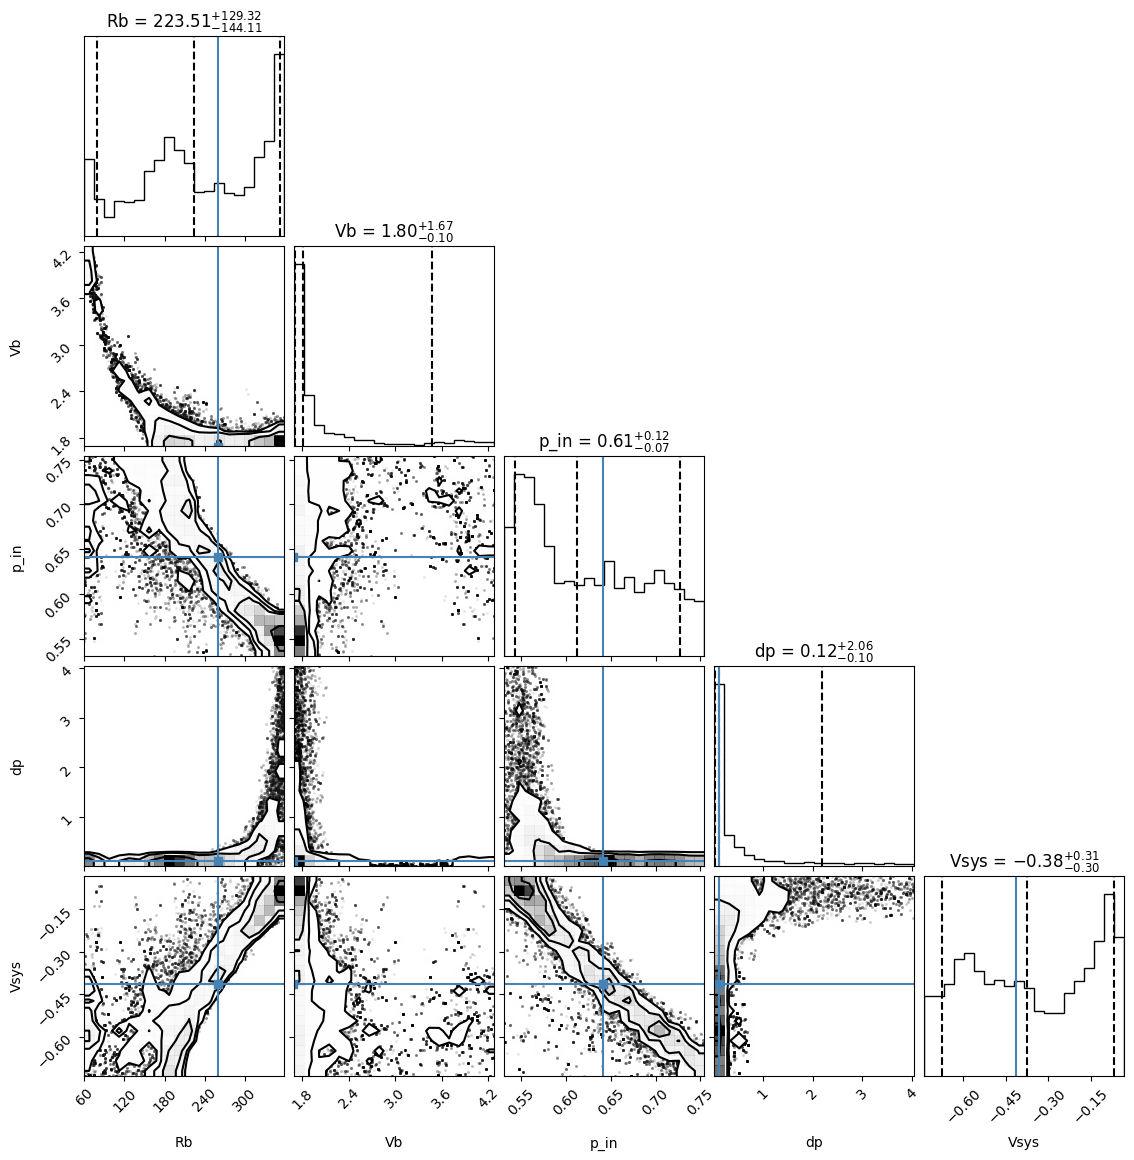

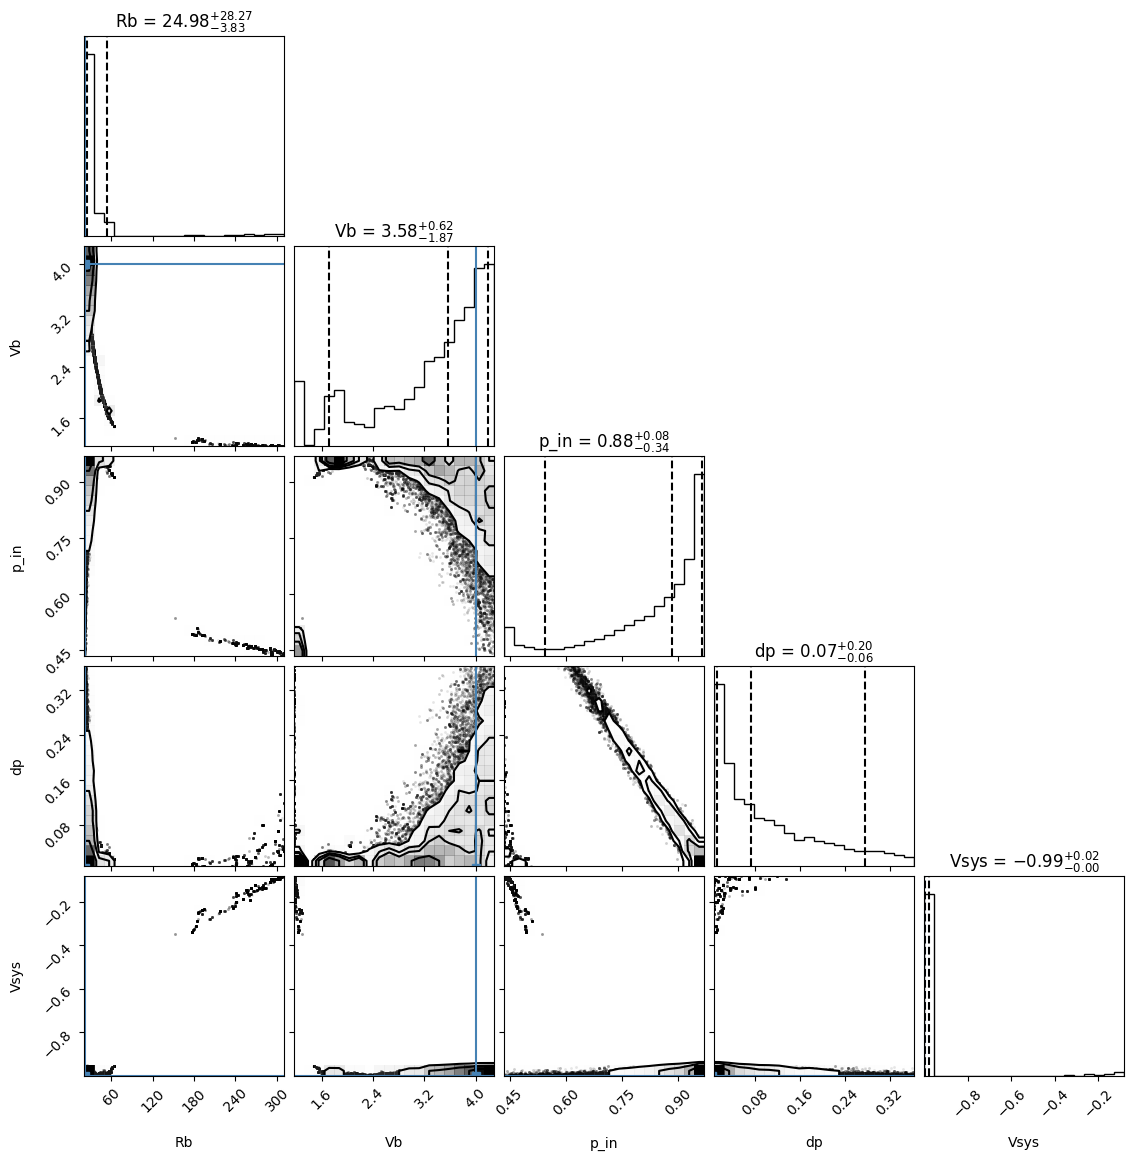

Corner plots in pvanalysis_Oph1_12CO_mTTT_tr3_vlim_1.corner_e.png and pvanalysis_Oph1_12CO_mTTT_tr3_vlim_1.corner_r.png
--- Edge ---
R_b   = 223.51 +/- 136.71 au
V_b   = 1.804 +/- 0.888 km/s
p_in  = 0.612 +/- 0.092
dp    = 0.118 +/- 1.081
v_sys = 1.925 +/- 0.302
r     = 29.19 --- 364.88 au
v     = 0.886 --- 5.900 km/s
M_in  = 1.450 +/- 1.534 Msun
M_out = 0.732 +/- 1.842 Msun
M_b   = 0.918 +/- 1.063 Msun


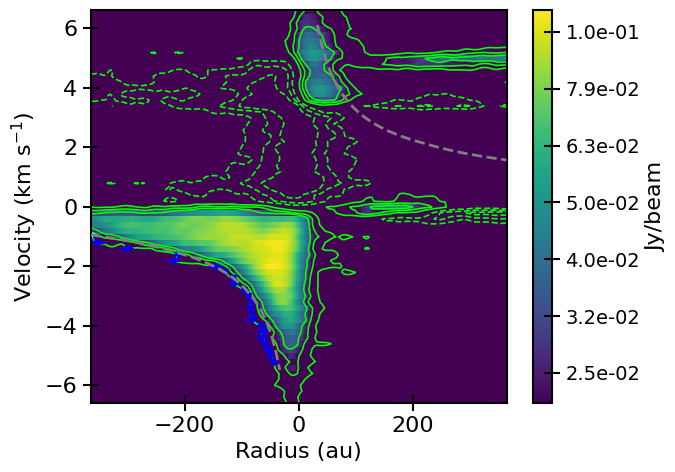

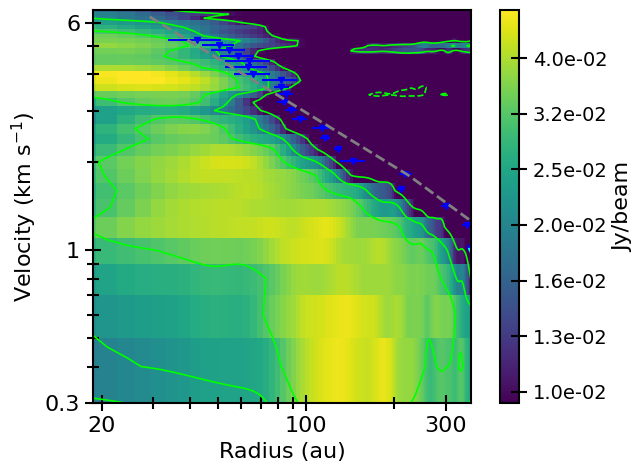

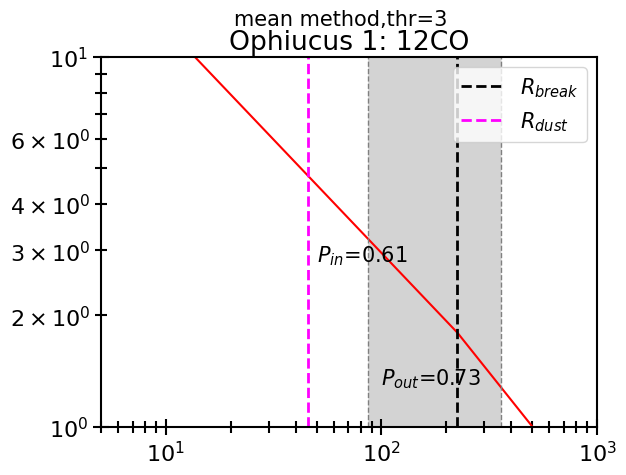

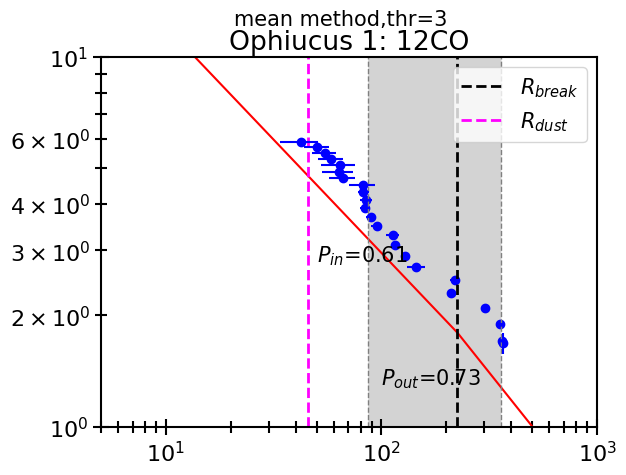

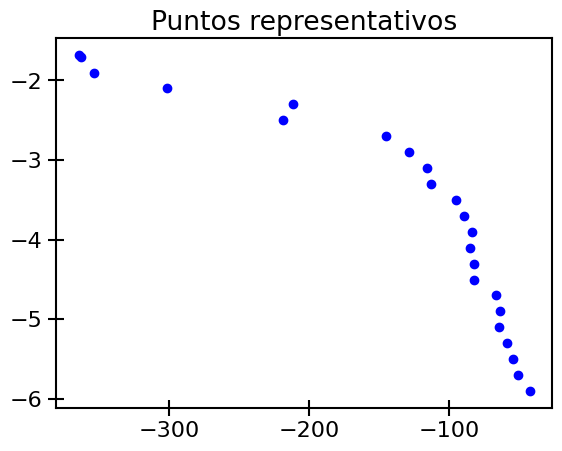

In [2]:
#######Ingresamos los outputs
'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph1_12CO_mTTT_tr3_vlim_1'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 3.42e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-380, 0, 0,0]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-6,0,0,0]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66

#########Guardamos todos los parámetros utilizados
filename= outname+".txt"
file_txt = open("C:/Users/josem/SLAM - test/Archivos Fits/Datos obtenidos/"+filename, "w")
file_txt.write(outname + os.linesep)
file_txt.write("inclinacion=" + str(incl) + ' deg' + os.linesep)
file_txt.write("Vsys=" + str(vsys) + ' km/s' + os.linesep)
file_txt.write("Distancia=" + str(dist) + ' pc' + os.linesep)
file_txt.write("rms=" + str(rms) + ' Jy/beam' +os.linesep)
file_txt.write("Treshold=" + str(thr) + os.linesep)
file_txt.write("ridgemode=" + ridgemode + os.linesep)
file_txt.write("Xlim=" + str(xlim) + ' au' + os.linesep)
file_txt.write("vlim=" + str(vlim) + ' km/s' + os.linesep)
file_txt.write("Mlim=" + str(Mlim) + ' Mlim' + os.linesep)
file_txt.write("xlim_plot=" + str(xlim_plot) + ' au' + os.linesep)
file_txt.write("vlim_plot=" + str(vlim_plot) + ' km/s' + os.linesep)
file_txt.write("use_velocity=" + str(use_velocity) + os.linesep)
file_txt.write("use_position=" + str(use_position) + os.linesep)
file_txt.write("include_vsys=" + str(include_vsys) + os.linesep)
file_txt.write("include_pin=" + str(include_pin) + os.linesep)
file_txt.write("Rdust=" + str(R_dust) )
file_txt.close()


##############Extraemos los datos
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
fit_result=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

#Leemos fits y extraemos los datos
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)

#Datos extraidos
rb= fit_result[0]
vb= fit_result[1]
pin= fit_result[2]
dp= fit_result[3]
v_sys=vsys-fit_result[4]
deltarb= fit_result[5]
vb_error=fit_result[6]
pin_error=fit_result[7]
dp_error=fit_result[8]
vsys_error=fit_result[9]
M_in=fit_result[10]
M_out=fit_result[11]
M_b=fit_result[12]
M_in_error=fit_result[13]
M_out_error=fit_result[14]
M_b_error=fit_result[15]
pout=pin+dp

#Creamos archivo de texto con todos los parámetros extraídos
file_txt = open("C:/Users/josem/SLAM - test/Archivos Fits/Parametros fits/"+filename, "w")
file_txt.write(outname + os.linesep)
file_txt.write('rb= ' + str(rb) + os.linesep)
file_txt.write('rb_error= ' + str(deltarb) + os.linesep)
file_txt.write('vb= ' + str(vb) + os.linesep)
file_txt.write('vb_error= ' + str(vb_error) + os.linesep)
file_txt.write('pin= ' + str(pin) + os.linesep)
file_txt.write('pin_error= ' + str(pin_error) + os.linesep)
file_txt.write('dp= ' + str(dp) + os.linesep)
file_txt.write('dp_error= ' + str(dp_error) + os.linesep)
file_txt.write('pout= ' + str(pout) + os.linesep)
file_txt.write('v_sys= ' + str(v_sys) + os.linesep)
file_txt.write('vsys_error= ' + str(vsys_error) + os.linesep)
file_txt.write('M_in= ' + str(M_in) + os.linesep)
file_txt.write('M_in_error= ' + str(M_in_error) + os.linesep)
file_txt.write('M_in= ' + str(M_out) + os.linesep)
file_txt.write('M_in_error= ' + str(M_out_error) + os.linesep)
file_txt.write('M_in= ' + str(M_b) + os.linesep)
file_txt.write('M_in_error= ' + str(M_b_error) + os.linesep)
file_txt.close()



x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)

#radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: 12CO')
plt.suptitle("mean method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: 12CO')
plt.suptitle("mean method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

In [ ]:
fit_result
rb= fit_result[0]
vb= fit_result[1]
p_in= fit_result[2]
dp= fit_result[3]
v_sys=vsys-fit_result[4]
rb_error= fit_result[5]
vb_error=fit_result[6]
pin_error=fit_result[7]
dp_error=fit_result[8]
vsys_error=fit_result[9]
M_in=fit_result[10]
M_out=fit_result[11]
M_b=fit_result[12]
M_in_error=fit_result[13]
M_out_error=fit_result[14]
M_b_error=fit_result[15]

In [ ]:
fit_result
R_b   = 296.49 +/- 105.77 au
V_b   = 1.763 +/- 0.303 km/s
p_in  = 0.583 +/- 0.086
dp    = 0.238 +/- 1.130
v_sys = 2.070 +/- 0.297
r     = 34.98 --- 364.88 au
v     = 1.258 --- 5.900 km/s
M_in  = 1.657 +/- 0.939 Msun
M_out = 1.017 +/- 1.104 Msun
M_b   = 1.162 +/- 0.576 Msun


In [ ]:
vsys-0.22953

### Gauss method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph1_12CO_gTTT_tr3_vlim'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 3.42e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-380, 0, 0, 380]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-6, 0,0,0]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: 12CO')
plt.suptitle("mean method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: 12CO')
plt.suptitle("gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.xlabel('Radio(ua)')
plt.ylabel('Velocidad $\frac{km}{s}$')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Treshure=4

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph1_12CO_gTTT_tr4_vlim'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 3.42e-3  # Jy/beam
thr = 4.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-380, 0, 0, 50]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-6, 0, 0, 0]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)

#Parametros
rb= 129.88
deltarb= 143.64
vb=2.062
pin=0.699
dp=0.079

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: 12CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')

plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: 12CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### pin=0.5 thr=3 /mean method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph1_12CO_mTTT_tr3_pin=05'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 3.42e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-380, 0, 0, 380]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-6, 0, 0, 0]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)

#Parametros
rb= 200.30
deltarb= 101.96
vb=2.511
pin=0.442
dp=0.198

pout=pin+dp
x=np.arange(0,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])
minimo_grafico=min(positivos)

max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: 12CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'pin=05' , dpi=300, bbox_inches='tight')

plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: 12CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'pin=05 abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

## 13CO

### Mean method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph1_13CO_mTTT_tr3'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 3.65e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-450, 0, 0, 210]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-5, 2.5,4.5 , 9]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66
'------------------------'
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit= impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: 12CO')
plt.suptitle("mean method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: 12CO')
plt.suptitle("gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)


#Parametros
rb= 244.43
deltarb= 78.65
vb=2.105
pin=0.484
dp=0.465

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 40,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: 13CO')
plt.suptitle("Mean method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 40,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: 13CO')
plt.suptitle("Mean method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Gauss method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph1_13CO_gTTT_tr3'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 3.65e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-450, 0, 0, 210]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-5, 2.5,4.5 , 9]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)


#Parametros
rb= 247.59
deltarb= 18.46
vb=2.079
pin=0.496
dp=0.485

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 40,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: 13CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 40,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: 13CO')
plt.suptitle("Gauss method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### THR=5 Gauss

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph1_13CO_mTTT_tr5'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 3.65e-3  # Jy/beam
thr = 5  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-450, 0, 0, 210]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-5, 2.5,4.5 , 9]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)


#Parametros
rb= 232.38
deltarb= 12.42
vb=1.889
pin=0.512
dp=0.565

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 40,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: 13CO')
plt.suptitle("Gauss method,thr=5", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 40,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: 13CO')
plt.suptitle("Gauss method, thr=5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### pin=05 thr=3

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph1_13CO_mTTT_tr3_pin=05'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 3.65e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-450, 0, 0, 210]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-5, 2.5,4.5 , 9]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)



#Parametros
rb= 249.21
deltarb= 16.64
vb=2.036
pin=0.5
dp=0.494

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 40,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: 13CO')
plt.suptitle("Mean method, thr=3,pin=0.5", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 40,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: 13CO')
plt.suptitle("Mean method, thr=3,pin=0.5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph1_13CO_mTTT_tr3_pin=05'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 3.65e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-450, 0, 0, 210]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-5, 2.5,4.5 , 9]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(10,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: C18O')
plt.suptitle("Mean method,thr=3,pin=0.5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(10,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: 13CO')
plt.suptitle("Thr=3, pin=0.5", fontsize='15')
plt.xlabel('Radio(ua)')
plt.ylabel('Velocidad (km/s)')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')

plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

## C17O

### Mean method

In [ ]:

'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_C17O_pvdiagram.fits'
outname = 'pvanalysis_Oph1_C17O_mTTT_tr3'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 1.22e-3  # Jy/beam
thr = 3.5  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-250, 0, 0, 250]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-4, 0, 0, 8]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66
'------------------------'

#rms del orden de 1e-3

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:

#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)




#Parametros
rb= 158.84
deltarb= 8.66
vb=2.598
pin=0.614
dp=0.470

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])
minimo_grafico=min(positivos)-20

max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,max_grafico)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: C17O')
plt.suptitle("Mean method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,max_grafico)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: C17O')
plt.suptitle("Mean method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Gauss method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_C17O_pvdiagram.fits'
outname = 'pvanalysis_Oph1_C17O_gTTT_tr3'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 1.22e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-250, 0, 0, 250]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-4, 0, 0, 8]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=True, plotedgepoint=True,
                    plotridgemodel=True, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)



#Parametros
rb= 159.63
deltarb=  9.31
vb=2.669
pin= 0.475
dp= 0.646


pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])
minimo_grafico=min(positivos)-20

max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,6)
plt.xlim(10,max_grafico)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 85,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: C17O')
plt.suptitle("Gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,6)
plt.xlim(10,max_grafico)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 85,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: C17O')
plt.suptitle("Gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Thr=4 Mean method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_C17O_pvdiagram.fits'
outname = 'pvanalysis_Oph1_C17O_mTTT_tr4'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 1.22e-3  # Jy/beam
thr = 4.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-250, 0, 0, 250]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-4, 0, 0, 8]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=True, plotedgepoint=True,
                    plotridgemodel=True, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)


#Parametros
rb= 158.43
deltarb=  63.35
vb=2.415
pin= 0.688
dp=0.210


pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])
minimo_grafico=min(positivos)-20

max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,6)
plt.xlim(10,max_grafico)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 85,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: C17O')
plt.suptitle("Gauss method,thr=4", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,6)
plt.xlim(10,max_grafico)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 85,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: C17O')
plt.suptitle("Gauss method,thr=4", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Thr=3 Mean method, pin=0.5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_C17O_pvdiagram.fits'
outname = 'pvanalysis_Oph1_C17O_mTTT_tr3'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 1.22e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-250, 0, 0, 250]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-4, 0, 0, 8]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)

#Parametros
rb= 161.76
deltarb= 8.76
vb=2.623
pin=0.5
dp=0.59

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])
minimo_grafico=min(positivos)

max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: C17O')
plt.suptitle("Gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'pin=05' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: C17O')
plt.suptitle("Gauss method,thr=3,pin=0.5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'pin=05 abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

## C18O

### Mean method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph1_C18O_mTTT_tr3'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 2.56e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-300, 0, 0, 300] # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-3.5, 0, 0, 8]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(10,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: C18O')
plt.suptitle("Mean method,thr=3,pin=0.5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(10,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: C18O')
plt.suptitle("Thr=3, pin=0.5", fontsize='15')
plt.xlabel('Radio(ua)')
plt.ylabel('Velocidad (km/s)')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')

plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

In [ ]:

'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph1_C18O_mTTT_tr3'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 2.56e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-300, 0, 0, 300] # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-3.5, 0, 0, 8]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66
'------------------------'


#Caso1
#Cuando dp es falso y pin es falso, el disco se va a mover keplerianamente con pin=0.5 y lo que obtengo del fit es el pout.
#no funciono 

#Siempre tomar dp =TRUE

#Caso2
#dp= TRUE, pin=TRUE, encuentra pin y pout para los datos.

#Testear con outlimit los casos en que hay absorción.

#Los puntos .dat no cambian, se obtienen los mismos



#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)



#Parametros
rb= 163.77
deltarb= 60.11
vb= 2.291
pin=0.522
dp=0.236

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])
minimo_grafico=min(positivos)-20

max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,5)
plt.xlim(20,max_grafico)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1 : C18O  ')
plt.suptitle("Mean method", fontsize='15')
plt.savefig('GRAFICO' +outname, dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,5)
plt.xlim(20,max_grafico)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1 : C18O  ')
plt.suptitle("Mean method", fontsize='15')
plt.savefig('GRAFICO' +outname + 'abs', dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Gaussian method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph1_C18O_gTTT_tr3'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 2.56e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-300, 0, 0, 300]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-3.5, 0, 0, 8]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66
'------------------------'

#### PV_analysis

In [ ]:
##PV_ANALYSIS

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=True, plotedgepoint=True,
                    plotridgemodel=True, plotedgemodel=True)

#### Double Power_Law

In [ ]:
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)


#Parametros
rb= 164.72
deltarb= 62.13
vb=2.284
pin=0.524
dp=0.227

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])
minimo_grafico=min(positivos)-20

max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,5)
plt.xlim(minimo_grafico,max_grafico)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: C18O')
plt.suptitle("gauss method , RMS=2.56", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.show()
plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,5)
plt.xlim(minimo_grafico,max_grafico)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: C18O')
plt.suptitle("gauss method , RMS=2.56", fontsize='15')
plt.savefig("GRAFICO"+ outname+'ABS', dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Velocidad acotada/ Mean method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph1_C18O_mTTT_tr3_vlim'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 2.56e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-300, 0, 0, 300]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-3.5, -1, 1, 8]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=True, plotedgepoint=True,
                    plotridgemodel=True, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)



#Parametros
rb= 160.68
deltarb= 55.62
vb=2.323
pin=0.520
dp=0.223

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])
minimo_grafico=min(positivos)-20

max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,5)
plt.xlim(minimo_grafico,max_grafico)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: C18O')
plt.suptitle("Vel acotada (mean)", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,5)
plt.xlim(minimo_grafico,max_grafico)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: C18O')
plt.suptitle("Vel acotada (mean)", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

#### pin=0.5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 1/Oph1_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph1_C18O_mTTT_tr3_pin=05'  # file name header for outputs
incl = 71.  # deg
vsys = 2.3# km/s
dist = 139.  # pc
rms = 2.56e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-300, 0, 0, 300]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-3.5, 0, 0, 8]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=45.66
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(10,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: C18O')
plt.suptitle("Mean method,thr=3,pin=0.5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(10,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: C18O')
plt.suptitle("Mean method,thr=3,pin=0.5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

# PV_Analysis Ophiucus 9

## 12CO

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 9/Oph9_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph9_12CO_mTTT_tr3'  # file name header for outputs
incl = 78.  # deg
vsys = 3.164# km/s
dist = 139.  # pc
rms = 3.19e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-280, 0, 0, 280]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -2,3 , 12]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.90
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(10,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: C18O')
plt.suptitle("Mean method,thr=3,pin=0.5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(10,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: 12CO')
plt.suptitle("Thr=3", fontsize='15')
plt.xlabel('Radio(ua)')
plt.ylabel('Velocidad (km/s)')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')

plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Mean method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 9/Oph9_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph9_12CO_mTTT_tr3'  # file name header for outputs
incl = 78.  # deg
vsys = 3.164# km/s
dist = 139.  # pc
rms = 3.19e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-280, 0, 0, 280]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -2,3 , 12]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.90
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=159)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)



#Parametros
rb= 103.09
deltarb= 63.13
vb=3.832
pin=0.505
dp=0.302

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 40,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: 12CO')
plt.suptitle("Mean method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 40,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: 12CO')
plt.suptitle("Mean method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Gauss method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 9/Oph9_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph9_12CO_gTTT_tr3'  # file name header for outputs
incl = 78.  # deg
vsys = 3.164# km/s
dist = 139.  # pc
rms = 3.19e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-280, 0, 0, 280]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -2,3 , 12]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.90
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=159)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)


#Parametros
rb= 61.09
deltarb= 63.11
vb=5.220
pin=0.368
dp=0.296

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,4,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: 12CO')
plt.suptitle("Gauss method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,4,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: 12CO')
plt.suptitle("Gauss method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Mean/Gauss thr=5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 9/Oph9_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph9_12CO_mTTT_tr5'  # file name header for outputs
incl = 78.  # deg
vsys = 3.164# km/s
dist = 139.  # pc
rms = 3.19e-3  # Jy/beam
thr = 5  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-280, 0, 0, 280]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -2,3 , 12]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.90
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=159)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)



#Parametros
rb= 59.39
deltarb= 44.15
vb=4.980
pin=0.374
dp=0.233

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,4,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: 12CO')
plt.suptitle("Mean method, thr=5", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,4,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: 12CO')
plt.suptitle("Mean method, thr=5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### pin=0.5 thr=5 mean

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 9/Oph9_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph9_12CO_mTTT_tr5'  # file name header for outputs
incl = 78.  # deg
vsys = 3.164# km/s
dist = 139.  # pc
rms = 3.19e-3  # Jy/beam
thr = 5  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-280, 0, 0, 280]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -2,3 , 12]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.90
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=159)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)


#Parametros
rb= 106.73
deltarb= 37.63
vb=3.620
pin=0.5
dp=0.091

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 40,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: 12CO')
plt.suptitle("Gauss method, thr=5, pin=0.5", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 40,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: 12CO')
plt.suptitle("Gauss method, thr=5, pin=0.5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

## 13CO

### Mean method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 9/Oph9_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph9_13CO_mTTT_tr3'  # file name header for outputs
incl = 78.  # deg
vsys = 3.164# km/s
dist = 139.  # pc
rms = 3.48e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-210, 0, 0, 210]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -2,2 , 6]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.90
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=159)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)


#Parametros
rb= 55.72
deltarb= 3.65
vb=5.286
pin=0.157
dp=0.734

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas


fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 40,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: 13CO')
plt.suptitle("Mean method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 40,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: 13CO')
plt.suptitle("Mean method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Gauss method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 9/Oph9_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph9_13CO_gTTT_tr3'  # file name header for outputs
incl = 78.  # deg
vsys = 3.164# km/s
dist = 139.  # pc
rms = 3.48e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-210, 0, 0, 210]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -2,2 , 7]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.90
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=159)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)


#Parametros
rb= 61.43
deltarb= 5.46
vb=4.834
pin=0.298
dp=0.606

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,4,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: 13CO')
plt.suptitle("Gauss method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,4,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: 13CO')
plt.suptitle("Gauss method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Mean/Gauss thr=5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 9/Oph9_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph9_13CO_gTTT_tr5'  # file name header for outputs
incl = 78.  # deg
vsys = 3.164# km/s
dist = 139.  # pc
rms = 3.48e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-210, 0, 0, 210]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -2,3 , 12]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.90
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=159)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)


#Parametros
rb= 62.22
deltarb= 6.05
vb=4.785
pin=0.315
dp=0.607

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,4,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: 13CO')
plt.suptitle("Gauss method, thr=5", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,4,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: 13CO')
plt.suptitle("Gauss method, thr=5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### pin=05 thr=3 Gauss

In [ ]:

'-------- INPUTS --------'
fitsfile = './Ophiucus 9/Oph9_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph9_13CO_gTTT_tr3_pin=05'  # file name header for outputs
incl = 78.  # deg
vsys = 3.164# km/s
dist = 139.  # pc
rms = 3.48e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-280, 0, 0, 280]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -2,3 , 12]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.90
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(10,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: C18O')
plt.suptitle("Mean method,thr=3,pin=0.5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(10,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: 13CO')
plt.suptitle("Thr=3", fontsize='15')
plt.xlabel('Radio(ua)')
plt.ylabel('Velocidad (km/s)')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')

plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 9/Oph9_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph9_13CO_gTTT_tr3_pin=05'  # file name header for outputs
incl = 78.  # deg
vsys = 3.164# km/s
dist = 139.  # pc
rms = 3.48e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-280, 0, 0, 280]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -2,3 , 12]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.90
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=159)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)


#Parametros
rb= 66.42
deltarb= 6.94
vb=4.462
pin=0.5
dp=0.343

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,4,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: 13CO')
plt.suptitle("Gauss method, thr=3,pin=0.5", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,4,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: 13CO')
plt.suptitle("Gauss method, thr=3,pin=0.5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

## C17O

### Mean method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 9/Oph9_C17O_pvdiagram.fits'
outname = 'pvanalysis_Oph9_C17O_mTTT_tr3'  # file name header for outputs
incl = 78.  # deg
vsys = 3.164# km/s
dist = 139.  # pc
rms = 1.21e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-160, 0, 0, 160]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-5, 0,0 , 5]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.90
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=159)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)


#Parametros
rb= 56.23
deltarb= 7.47
vb=3.921
pin=0.154
dp=1.988

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,3,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: C17O')
plt.suptitle("Mean method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,3,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: C17O')
plt.suptitle("Mean method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Gauss method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 9/Oph9_C17O_pvdiagram.fits'
outname = 'pvanalysis_Oph9_C17O_gTTT_tr3'  # file name header for outputs
incl = 78.  # deg
vsys = 3.164# km/s
dist = 139.  # pc
rms = 1.21e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-160, 0, 0, 160]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-5, 0,0 , 5]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.90
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=159)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)


#Parametros
rb= 56.89
deltarb= 7.77
vb=3.942
pin=0.125
dp=2.096

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,3,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: C17O')
plt.suptitle("Gauss method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,3,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: C17O')
plt.suptitle("Gauss method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Mean/Gauss thr=5

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=159)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

### pin=05 thr=3 mean

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 9/Oph9_C17O_pvdiagram.fits'
outname = 'pvanalysis_Oph9_C17O_mTTT_tr3_pin=05'  # file name header for outputs
incl = 78.  # deg
vsys = 3.164# km/s
dist = 139.  # pc
rms = 1.21e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-160, 0, 0, 160]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-5, 0,0 , 5]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.90
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=159)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)


#Parametros
rb= 48.30
deltarb= 7.46
vb=3.739
pin=0.5
dp=0.531

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,3,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: C17O')
plt.suptitle("Gauss method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,3,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: C17O')
plt.suptitle("Gauss method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

## C18O

### Mean method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 9/Oph9_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph9_C18O_mTTT_tr3'  # file name header for outputs
incl = 78.  # deg
vsys = 3.164# km/s
dist = 139.  # pc
rms = 2.46e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-140, 0, 0, 140]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -2,2 , 7]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.90
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=159)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)



#Parametros
rb= 56.33
deltarb= 20.32
vb=4.240
pin=0.889
dp=0.542

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,3,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: C18O')
plt.suptitle("Mean method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,3,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: C18O')
plt.suptitle("Mean method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Gauss method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 9/Oph9_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph9_C18O_gTTT_tr3'  # file name header for outputs
incl = 78.  # deg
vsys = 3.164# km/s
dist = 139.  # pc
rms = 2.46e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-140, 0, 0, 140]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -2,3 , 12]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.90
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=159)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)


#Parametros
rb= 68.50
deltarb= 17.51
vb=3.965
pin=0.618
dp=0.618

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,3,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: C18O')
plt.suptitle("Gauss method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,3,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: C18O')
plt.suptitle("Gauss method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Mean/Gauss thr=5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 9/Oph9_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph9_C18O_gTTT_tr5'  # file name header for outputs
incl = 78.  # deg
vsys = 3.164# km/s
dist = 139.  # pc
rms = 2.46e-3  # Jy/beam
thr = 5  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-140, 0, 0, 140]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -2,3 , 12]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.90
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=159)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)



#Parametros
rb= 49.85
deltarb= 3.8
vb=4.391
pin=0.320
dp=1.608

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,3,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: C18O')
plt.suptitle("Gauss method, thr=5", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,3,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: C18O')
plt.suptitle("Gauss method, thr=5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### pin=05 thr=3 mean

In [ ]:

'-------- INPUTS --------'
fitsfile = './Ophiucus 9/Oph9_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph9_C18O_gTTT_tr3_pin=05'  # file name header for outputs
incl = 78.  # deg
vsys = 3.164# km/s
dist = 139.  # pc
rms = 2.46e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-140, 0, 0, 140]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -2,2 , 12]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.90
'------------------------'


impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(10,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 1: C18O')
plt.suptitle("Mean method,thr=3,pin=0.5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(10,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 9: C18O')
plt.suptitle("Thr=3", fontsize='15')
plt.xlabel('Radio(ua)')
plt.ylabel('Velocidad (km/s)')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')

plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 9/Oph9_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph9_C18O_gTTT_tr3_pin=05'  # file name header for outputs
incl = 78.  # deg
vsys = 3.164# km/s
dist = 139.  # pc
rms = 2.46e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-140, 0, 0, 140]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -2,2 , 12]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.90
'------------------------'

#### PV_analysis

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=159)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

# PV_Analysis Ophiucus 3

## 12CO

### Mean method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 3/Oph3_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph3_12CO_mTTT_tr3'  # file name header for outputs
incl = 20   # deg
vsys = 3.164# km/s
dist = 139.  # pc
rms = 1e-3  # Jy/beam
thr = 3  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-290, 0, 0, 290]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-5, 0,0 , 12.8]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=13.21
'------------------------'

#### PV_analyisis

In [ ]:
lista = impv.output_fitresult()

In [ ]:
impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=49)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)

#### Double Power-Law

In [ ]:
#file= open("pvanalysis.edge.dat",'r')
name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)



#Parametros
rb= 56.33
deltarb= 20.32
vb=4.240
pin=0.889
dp=0.542

pout=pin+dp
x=np.arange(0.1,1000,0.1)



for i in range(9):
    print(lista[0])
    lista.pop(0)
    
    
len(lista)
#Separamos las 4 filas

fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')
#plt.plot(radios,fila3, 'ro',markersize=2)
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)

def g(x,p,q):
    #print(x)
    ##print(x[0])
    #print(type(x[0]))
    vel=np.zeros(len(x))
    for i in range(len(x)):
        #print(x[i])
        
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel




#fit=g(Fila1,pin,pout)
fitx=g(x,pin,pout)

pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,3,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: 12CO')
plt.suptitle("Mean method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")

deltaminus=rb-deltarb
deltaplus=rb+deltarb


plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
              #ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])

#plt.plot(radios,fila3,'.' )
#plt.plot(deltaplus,fila3, 'mo',markersize=1)
#plt.plot(deltaminus,fila3, 'mo',markersize=1)
plt.text( 20,3,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 80,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: 12CO')
plt.suptitle("Mean method, thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Gauss method

#### PV_analyisis

#### Double Power-Law

### THR=5

#### PV_analyisis

#### Double Power-Law

### pin=0.5

#### PV_analyisis

#### Double Power-Law

## 13CO

# PV_Analysis Ophiucus 6

## 12CO

### Mean method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 6/Oph6_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph6_12CO_MTTT_tr3'  # file name header for outputs
incl = 23.  # deg
vsys = 2.1# km/s
dist = 139.  # pc
rms = 3.46e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-320, 0, 0, 320]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-6, 0,0,0]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.47
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=-12.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: 12CO')
plt.suptitle("mean method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: 12CO')
plt.suptitle("mean method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

In [ ]:
################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
rb=50
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: 12CO')
plt.suptitle("mean method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: 12CO')
plt.suptitle("mean method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Gauss Method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 6/Oph6_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph6_12CO_gTTT_tr3'  # file name header for outputs
incl = 23.  # deg
vsys = 2.1# km/s
dist = 139.  # pc
rms = 3.46e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-320, 0, 0, 320]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-6, 0,0,0]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.47
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=-12.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: 12CO')
plt.suptitle("gauss method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: 12CO')
plt.suptitle("gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Thr=5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 6/Oph6_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph6_12CO_gTTT_tr5'  # file name header for outputs
incl = 23.  # deg
vsys = 2.1# km/s
dist = 139.  # pc
rms = 3.46e-3  # Jy/beam
thr = 5.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-320, 0, 0, 320]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-6, 0,0,0]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.47
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=-12.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: 12CO')
plt.suptitle("gauss method,thr=5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: 12CO')
plt.suptitle("gauss method,thr=5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### pin=0.5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 6/Oph6_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph6_12CO_gTTT_tr3_pin=05'  # file name header for outputs
incl = 23.  # deg
vsys = 2.1# km/s
dist = 139.  # pc
rms = 3.46e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-320, 0, 100, 320]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-6, 0,0,6]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.47
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=-12.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 30,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: 12CO')
plt.suptitle("Thr=3, pin=0.5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 15,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 110,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: 12CO')
plt.suptitle("Thr=3, pin=0.5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.xlabel('Radio(ua)')
plt.ylabel('Velocidad (km/s)')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

## 13CO

### Mean method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 6/Oph6_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph6_13CO_MTTT_tr3'  # file name header for outputs
incl = 23.  # deg
vsys = 2.1# km/s
dist = 139.  # pc
rms = 3.47e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-180, 0, 0, 180]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-5, 0,0,5]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.47
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=-12.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: 13CO')
plt.suptitle("Mean method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: 13CO')
plt.suptitle("Mean method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Gauss method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 6/Oph6_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph6_13CO_gTTT_tr3'  # file name header for outputs
incl = 23.  # deg
vsys = 2.1# km/s
dist = 139.  # pc
rms = 3.47e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-180, 0, 0, 180]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-5, 0,0,5]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.47
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=-12.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: 13CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: 13CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Thr=5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 6/Oph6_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph6_13CO_gTTT_tr5'  # file name header for outputs
incl = 23.  # deg
vsys = 2.1# km/s
dist = 139.  # pc
rms = 3.47e-3  # Jy/beam
thr = 5.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-180, 0, 0, 180]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-5, -1,3,6]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.47
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=-12.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: 13CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: 13CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### pin=0.5 

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 6/Oph6_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph6_13CO_gTTT_tr3_pin=05'  # file name header for outputs
incl = 23.  # deg
vsys = 2.1# km/s
dist = 139.  # pc
rms = 3.47e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-380, 0, 0, 380]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-6, 0,0,0]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.47
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=-12.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: 13CO')
plt.suptitle("Gauss method,thr=3,pin=0.5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: 13CO')
plt.suptitle("Gauss method,thr=3,pin=0.5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

## C18O

### Mean method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 6/Oph6_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph6_C18O_mTTT_tr3'  # file name header for outputs
incl = 23.  # deg
vsys = 2.1# km/s
dist = 139.  # pc
rms = 2.45e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-180, 0, 0, 180]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([0, 0,0,5]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.47
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=-12.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: C18O')
plt.suptitle("Mean method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: C18O')
plt.suptitle("Mean method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Gauss method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 6/Oph6_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph6_C18O_gTTT_tr3'  # file name header for outputs
incl = 23.  # deg
vsys = 2.1# km/s
dist = 139.  # pc
rms = 2.45e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-180, 0, 0, 180]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-6, 0,0,6]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.47
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=-12.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: C18O')
plt.suptitle("Gauss method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: C18O')
plt.suptitle("Gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### THR=5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 6/Oph6_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph6_C18O_mTTT_tr5'  # file name header for outputs
incl = 23.  # deg
vsys = 2.1# km/s
dist = 139.  # pc
rms = 2.45e-3  # Jy/beam
thr = 5.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-180, 0, 0, 180]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-5, -0.5,3,5]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.47
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=-12.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: C18O')
plt.suptitle("Mean method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: C18O')
plt.suptitle("Mean method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### pin=0.5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 6/Oph6_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph6_C18O_mTTT_tr3'  # file name header for outputs
incl = 23.  # deg
vsys = 2.1# km/s
dist = 139.  # pc
rms = 2.45e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-180, 0, 0, 180]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-5, -0.5,3,5]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.47
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=-12.34)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: C18O')
plt.suptitle("Mean method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: C18O')
plt.suptitle("Mean method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

# PV_Analysis Ophiucus 8

## 12CO

### Mean method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 8/Oph8_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph8_12CO_mTTT_tr3'  # file name header for outputs
incl = 69.7  # deg
vsys = 3# km/s
dist = 139.  # pc
rms = 3.07e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-150, 0, 0, 150]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-8, 0,0,8]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.47
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=72.3)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: C18O')
plt.suptitle("Mean method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 8: 12CO')
plt.suptitle("Mean method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Gauss method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 8/Oph8_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph8_12CO_gTTT_tr3'  # file name header for outputs
incl = 69.7  # deg
vsys = 3# km/s
dist = 139.  # pc
rms = 3.07e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-140, 0, 0, 140]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-6, 0,0,6]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.47
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=72.3)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 8: 12CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 8: 12CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### THR=5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 8/Oph8_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph8_12CO_mTTT_tr5'  # file name header for outputs
incl = 69.7  # deg
vsys = 3# km/s
dist = 139.  # pc
rms = 3.07e-3  # Jy/beam
thr = 5.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-140, 0, 0, 140]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, 0,0,7]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.47
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=72.3)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: C18O')
plt.suptitle("Mean method,thr=5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 8: 12CO')
plt.suptitle("Mean method,thr=5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### pin=0.5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 8/Oph8_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph8_12CO_mTTT_tr3_pin=05'  # file name header for outputs
incl = 69.7  # deg
vsys = 3# km/s
dist = 139.  # pc
rms = 3.07e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-150, 0, 0, 150]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-8, 0,0,8]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=16.47
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=72.3)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 6: C18O')
plt.suptitle("Mean method,thr=3,pin=0.5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 8: 12CO')
plt.suptitle("Mean method,thr=3,pin=0.5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

# PV_Analysis Ophiucus 10

## 12CO

### Mean method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 10/Oph10_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph10_12CO_mTTT_tr3'  # file name header for outputs
incl = 84.  # deg
vsys = 3.06# km/s
dist = 139.  # pc
rms = 3.05e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-220, 0, 0, 220]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -1,2 ,10]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=32.72
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=54.46)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 10: 12CO')
plt.suptitle("Mean method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 10: 12CO')
plt.suptitle("Mean method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Gauss method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 10/Oph10_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph10_12CO_gTTT_tr3'  # file name header for outputs
incl = 84.  # deg
vsys = 3.1# km/s
dist = 139.  # pc
rms = 3.05e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-220, 0, 0, 110]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -1,2,2]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=32.72
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=54.46)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 10: 12CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 10: 12CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### THR=5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 10/Oph10_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph10_12CO_gTTT_tr5'  # file name header for outputs
incl = 84.  # deg
vsys =3.1# km/s
dist = 139.  # pc
rms = 3.05e-3  # Jy/beam
thr = 5.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-220, 0, 0, 220]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -1,2,6]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=32.72
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=54.46)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 10: 12CO')
plt.suptitle("Gauss method,thr=5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 10: 12CO')
plt.suptitle("Gauss method,thr=5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### pin=0.5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 10/Oph10_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph10_12CO_gTTT_tr3_pin=05'  # file name header for outputs
incl = 84.  # deg
vsys = 3.1# km/s
dist = 139.  # pc
rms = 3.05e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-220, 0, 0, 110]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -1,2,2]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=32.72
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=54.46)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 10: 12CO')
plt.suptitle("Gauss method,thr=3,pin=0.5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 10: 12CO')
plt.suptitle("Gauss method,thr=3,pin=0.5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

## 13CO

### Mean method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 10/Oph10_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph10_13CO_mTTT_tr3'  # file name header for outputs
incl = 84.  # deg
vsys = 3.1# km/s
dist = 139.  # pc
rms = 3.48e-3  # Jy/beam
thr = 5.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-180, 0, 0, 140]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-4, 0,2,6]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=32.72
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=54.46)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 10: 13CO')
plt.suptitle("Mean method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 10: 13CO')
plt.suptitle("Mean method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Gauss method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 10/Oph10_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph10_13CO_gTTT_tr3'  # file name header for outputs
incl = 84.  # deg
vsys = 2.1# km/s
dist = 139.  # pc
rms = 3.48e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-220, 0, 0, 220]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, 0,0,5]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=32.72
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=54.46)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 10: 13CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 10: 13CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### THR=5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 10/Oph10_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph10_13CO_gTTT_tr5'  # file name header for outputs
incl = 84.  # deg
vsys = 2.1# km/s
dist = 139.  # pc
rms = 3.48e-3  # Jy/beam
thr = 5.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-220, 0, 0, 220]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, 0,0,5]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=32.72
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=54.46)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 10: 13CO')
plt.suptitle("Gauss method,thr=5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 10: 13CO')
plt.suptitle("Gauss method,thr=5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### pin=0.5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 10/Oph10_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph10_13CO_gTTT_tr3_pin=05'  # file name header for outputs
incl = 84.  # deg
vsys = 2.1# km/s
dist = 139.  # pc
rms = 3.48e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-220, 0, 0, 220]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, 0,0,5]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=32.72
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=54.46)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 10: 13CO')
plt.suptitle("Gauss method,thr=3,pin=0.5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 10: 13CO')
plt.suptitle("Gauss method,thr=3,pin=0.5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

# PV_Analysis Ophiucus 2

## 12CO

### Mean method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 2/Oph2_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph2_12CO_mTTT_tr3'  # file name header for outputs
incl = 79.5  # deg
vsys = 2.5# km/s
dist = 139.  # pc
rms = 3.05e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-300, 0, 0, 300]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -1,2 ,10]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.97)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(000.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: 12CO')
plt.suptitle("Mean method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: 12CO')
plt.suptitle("Mean method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Gauss method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 2/Oph2_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph2_12CO_gTTT_tr3'  # file name header for outputs
incl = 79.5  # deg
vsys = 2.5# km/s
dist = 139.  # pc
rms = 3.05e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-300, 0, 0, 300]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -1,2 ,10]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.97)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: 12CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: 12CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### THR= 5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 2/Oph2_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph2_12CO_mTTT_tr5'  # file name header for outputs
incl = 79.5  # deg
vsys = 2.5# km/s
dist = 139.  # pc
rms = 3.05e-3  # Jy/beam
thr = 5.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-300, 0, 0, 300]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -1,2 ,10]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.97)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: 12CO')
plt.suptitle("Gauss method,thr=5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: 12CO')
plt.suptitle("Gauss method,thr=5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### pin=0.5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 2/Oph2_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph2_12CO_mTTT_tr5_pin=05'  # file name header for outputs
incl = 79.5  # deg
vsys = 2.5# km/s
dist = 139.  # pc
rms = 3.05e-3  # Jy/beam
thr = 5.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-300, 0, 0, 300]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, -1,2 ,10]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.97)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: 12CO')
plt.suptitle("Gauss method,thr=3,pin=0.5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: 12CO')
plt.suptitle("Gauss method,thr=3,pin=0.5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

## 13CO

### Mean method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 2/Oph2_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph2_13CO_mTTT_tr3'  # file name header for outputs
incl = 79.5  # deg
vsys = 2.4# km/s
dist = 139.  # pc
rms = 3.48e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-200, -20, 20, 200]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-5, -2.5,0.5,5]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.97)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: 12CO')
plt.suptitle("Mean method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: 13CO')
plt.suptitle("Mean method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Gauss method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 2/Oph2_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph2_13CO_gTTT_tr3'  # file name header for outputs
incl = 79.5  # deg
vsys = 2.5# km/s
dist = 139.  # pc
rms = 3.48e-3  # Jy/beam
thr = 4.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-200, -20, 20, 200]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-5, -2.5,0.5,5]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.97)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: 13CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: 13CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### THR= 5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 2/Oph2_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph2_13CO_mTTT_tr5'  # file name header for outputs
incl = 79.5  # deg
vsys = 2.5# km/s
dist = 139.  # pc
rms = 3.48e-3  # Jy/beam
thr = 5.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-200, -20, 20, 200]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-5, -2.5,0.5,5]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.97)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: 13CO')
plt.suptitle("Mean method,thr=5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: 13CO')
plt.suptitle("Gauss method,thr=5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### pin=0.5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 2/Oph2_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph2_13CO_mTTT_tr3_pin=05'  # file name header for outputs
incl = 79.5  # deg
vsys = 2.4# km/s
dist = 139.  # pc
rms = 3.48e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-200, -20, 20, 200]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-5, -2.5,0.5,5]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.97)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(10,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: 13CO')
plt.suptitle("Mean method,thr=3,pin=0.5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(10,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: 13CO')
plt.suptitle("Mean method,thr=3,pin=0.5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

## C18O

### Mean method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 2/Oph2_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph2_C18O_mTTT_tr3'  # file name header for outputs
incl = 79.5  # deg
vsys = 2.5# km/s
dist = 139.  # pc
rms = 2.46e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-180, 0, 0, 180]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-6, 0,1,6]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.97)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: C18O')
plt.suptitle("Mean method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: C18O')
plt.suptitle("Mean method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Gauss method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 2/Oph2_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph2_C18O_gTTT_tr3'  # file name header for outputs
incl = 79.5  # deg
vsys = 2.5# km/s
dist = 139.  # pc
rms = 2.46e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-180, 0, 0, 180]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-6, 0,1,6]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.97)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: C18O')
plt.suptitle("Gauss method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: C18O')
plt.suptitle("Gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### THR= 5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 2/Oph2_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph2_C18O_mTTT_tr5'  # file name header for outputs
incl = 79.5  # deg
vsys = 2.5# km/s
dist = 139.  # pc
rms = 2.46e-3  # Jy/beam
thr = 2.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-180, 0, 0, 180]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-6, 0,1,6]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.97)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: C18O')
plt.suptitle("Mean method,thr=5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: C18O')
plt.suptitle("Mean method,thr=5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### pin=0.5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 2/Oph2_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph2_C18O_mTTT_tr3_pin=05'  # file name header for outputs
incl = 79.5  # deg
vsys = 2.5# km/s
dist = 139.  # pc
rms = 2.46e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-200, 0, 0, 200]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-7, 0,0,5]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=51.97)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: C18O')
plt.suptitle("Mean method,thr=3,pin=0.5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 2: C18O')
plt.suptitle("Mean method,thr=3,pin=0.5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

# PV_Analysis Ophiucus 3

## 12CO

### Mean method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 3/Oph3_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph3_12CO_mTTT_tr3'  # file name header for outputs
incl = 61.5  # deg
vsys = 5.4# km/s
dist = 139.  # pc
rms = 3.78e-3  # Jy/beam
thr = 4.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-300, 0, 0, 10]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([0, 0,0,10]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=13.21
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=86.27)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: 12CO')
plt.suptitle("Mean method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: 12CO')
plt.suptitle("Mean method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Gauss method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 3/Oph3_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph3_12CO_gTTT_tr3'  # file name header for outputs
incl = 61.5  # deg
vsys = 5.4# km/s
dist = 139.  # pc
rms = 3.78e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-300, 0, 0, 100]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([0, 0,0,10]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=86.27)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: 12CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: 12CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### THR=5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 3/Oph3_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph3_12CO_mTTT_tr5'  # file name header for outputs
incl = 61.5  # deg
vsys = 5.4 #km/s
dist = 139.  # pc
rms = 3.78e-3  # Jy/beam
thr = 5.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-300, 0, 0, 10]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([0, 0,0,10]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=86.27)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: 12CO')
plt.suptitle("Mean method,thr=5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: 12CO')
plt.suptitle("Mean method,thr=5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### pin=0.5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 3/Oph3_12CO_pvdiagram.fits'
outname = 'pvanalysis_Oph3_12CO_mTTT_tr5_pin=05'  # file name header for outputs
incl = 61.5  # deg
vsys = 5.45# km/s
dist = 139.  # pc
rms = 3.78e-3  # Jy/beam
thr = 5.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-300, 0, 0, 100]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([0, 0,0,10]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=86.27)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(0.2,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: 12CO')
plt.suptitle("Mean method,thr=3;pin=0.5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(0.2,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 90,0.5,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: 12CO')
plt.suptitle("Thr=5, pin=0.5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.xlabel('Radio(ua)')
plt.ylabel('Velocidad (km/s)')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

## 13CO

### Mean method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 3/Oph3_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph3_13CO_mTTT_tr3'  # file name header for outputs
incl = 61.5  # deg
vsys = 4.4# km/s
dist = 139.  # pc
rms = 3.57e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-300, -25, 25, 300]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-4, -2,1,4]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=86.27)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: 13CO')
plt.suptitle("Mean method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: 13CO')
plt.suptitle("Mean method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Gauss method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 3/Oph3_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph3_13CO_gTTT_tr3'  # file name header for outputs
incl = 61.5  # deg
vsys = 4.4# km/s
dist = 139.  # pc
rms = 3.57e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-300, -25, 25, 300]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-4, -2,1,4]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=86.27)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: 13CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: 13CO')
plt.suptitle("Gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### THR=5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 3/Oph3_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph3_13CO_mTTT_tr5'  # file name header for outputs
incl = 61.5  # deg
vsys = 4.4# km/s
dist = 139.  # pc
rms = 3.57e-3  # Jy/beam
thr = 5.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-300, -25, 25, 300]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-4, -2,1,4]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=86.27)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: 13CO')
plt.suptitle("Mean method,thr=5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: 13CO')
plt.suptitle("Mean method,thr=5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### pin=0.5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 3/Oph3_13CO_pvdiagram.fits'
outname = 'pvanalysis_Oph3_13CO_mTTT_tr3_pin=05'  # file name header for outputs
incl = 61.5 # deg
vsys = 4.4# km/s
dist = 139.  # pc
rms = 3.57e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-300, -25, 25, 300]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-4, -2,1,4]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=86.27)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: 13CO')
plt.suptitle("Mean method,thr=3,pin=0.5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: 13CO')
plt.suptitle("Mean method,thr=3,pin=0.5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

## C18O

### Mean method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 3/Oph3_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph3_C18O_mTTT_tr3'  # file name header for outputs
incl = 61.5  # deg
vsys = 4.5# km/s
dist = 139.  # pc
rms = 2.47e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-100, 0, 0, 100]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-6, -1,1,6]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=86.27)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: C18O')
plt.suptitle("Mean method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: C18O')
plt.suptitle("Mean method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### Gauss method

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 3/Oph3_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph3_C18O_gTTT_tr3'  # file name header for outputs
incl = 61.5  # deg
vsys = 4.5# km/s
dist = 139.  # pc
rms = 2.47e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'gauss'  # 'mean' or 'gauss'
xlim = [-100, 0, 0, 100]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-6, -1,1,6]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=86.27)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: C18O')
plt.suptitle("Gauss method,thr=3", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: C18O')
plt.suptitle("Gauss method,thr=3", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### THR=5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 3/Oph3_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph3_C18O_mTTT_tr5'  # file name header for outputs
incl = 61.5  # deg
vsys = 4.5# km/s
dist = 139.  # pc
rms = 2.47e-3  # Jy/beam
thr = 5.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-100, 0, 0, 100]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-6, -1,1,6]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=86.27)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: C18O')
plt.suptitle("Mean method,thr=5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: C18O')
plt.suptitle("Mean method,thr=5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

### pin=0.5

In [ ]:
'-------- INPUTS --------'
fitsfile = './Ophiucus 3/Oph3_C18O_pvdiagram.fits'
outname = 'pvanalysis_Oph3_C18O_mTTT_tr3_pin=05'  # file name header for outputs
incl = 61.5  # deg
vsys = 4.5# km/s
dist = 139.  # pc
rms = 2.47e-3  # Jy/beam
thr = 3.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-100, 0, 0, 100]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-6, -1,1,6]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [375./20. , 375.]  # au; [inlim, outlim]
vlim_plot = [6./20. , 13.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
R_dust=20.17
'------------------------'

impv = PVAnalysis(fitsfile, rms, vsys, dist, pa=86.27)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode, incl=incl,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
parameters_fit=impv.output_fitresult()

impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=show_pv, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=False, plotedgepoint=True,
                    plotridgemodel=False, plotedgemodel=True)


################### Comienzo del fiteo

name=outname+'.edge.dat'
file=open(name,'r')
texto=file.read()
lista= texto.split()
np.shape(lista)
rb= parameters_fit[0]
vb= parameters_fit[1]
print(rb)
print(vb)
pin= parameters_fit[2]
dp=parameters_fit[3]
deltarb= parameters_fit[5]
pout=pin+dp
x=np.arange(0.1,1000,0.1)

for i in range(9):
    lista.pop(0)
    
fila1=[]
fila2=[]
fila3=[]
fila4=[]

for i in range(len(lista)):
    elemento=float(lista[i])
    if i%4==0:
        fila1.append(elemento)
    
    if i%4==1:
        fila2.append(elemento)
    
    if i%4==2:
        fila3.append(elemento)
        
    if i%4==3:
        fila4.append(elemento)    

Fila1=np.array(fila1)
Fila2=np.array(fila2)
Fila3=np.array(fila3)
Fila4=np.array(fila4)
radios=np.ones(len(fila1))*rb
deltaplus=np.ones(len(fila1))*(rb+deltarb)
deltaminus=np.ones(len(fila1))*(rb-deltarb)
plt.loglog(Fila1,Fila3,'bo')

#Funcion que modela las velocidades
def g(x,p,q):
    vel=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i])<rb:
            vel[i]=vb*(x[i]/rb)**-p
        if abs(x[i])>rb:
            vel[i]=vb*(x[i]/rb)**-q
    
    return vel

fitx=g(x,pin,pout)
pin_round= round(pin,2)
pout_round= round(pout,2)

positivos=[]
#Sacamos el minimo del grafico xlim
for i in range(len(Fila1)):
    if Fila1[i]>0:
        positivos.append(Fila1[i])


max_grafico=max(Fila1)+ 100

plt.plot(x,fitx,'r')
plt.loglog(Fila1,Fila3,'bo')
plt.ylim(1,10)
plt.xlim(5,1000)

ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(Fila1,Fila3,yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: C18O')
plt.suptitle("Mean method,thr=3,pin=0.5", fontsize='15')
#plt.savefig("GRAFICO"+ outname , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Probamos con valor absoluto

plt.plot(x,fitx,'r')
#plt.loglog(Fila1,fit,'r')
plt.loglog(abs(Fila1),abs(Fila3),'bo')
plt.ylim(1,10)
plt.xlim(5,1000)
ejex=np.arange(0,1,1)
a=plt.axvline(x=rb, ymin=0, ymax=10,color = "black", linewidth = 2, linestyle = "dashed")
b=plt.axvline(x=rb-deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
c=plt.axvline(x=rb+deltarb, ymin=0, ymax=10,color = "gray", linewidth = 1, linestyle = "dashed")
d=plt.axvline(x=R_dust, ymin=0, ymax=10,color = "magenta", linewidth = 2, linestyle = "dashed")
deltaminus=rb-deltarb
deltaplus=rb+deltarb
plt.fill_betweenx(fitx, deltaminus, deltaplus,facecolor='lightgray')
plt.legend([a,d],['$R_{break}$','$R_{dust}$'],loc='upper right',fontsize=15)
plt.text( 50,2.8,'$P_{in}$='+ str(pin_round), fontsize=15, color='black')
plt.text( 100,1.3,'$P_{out}$='+ str(pout_round), fontsize=15, color='black')
plt.errorbar(abs(Fila1),abs(Fila3),yerr=Fila4,xerr=Fila2,fmt = 'bo', ms=1)
plt.title('Ophiucus 3: C18O')
plt.suptitle("Mean method,thr=3,pin=0.5", fontsize='15')
plt.savefig("GRAFICO"+ outname+'abs' , dpi=300, bbox_inches='tight')
plt.show()

########################################################################################################
########################################################################################################
#Mostramos los puntos

plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.show()

In [ ]:
plt.plot(Fila1,Fila3,'bo')
plt.title('Puntos representativos')
plt.xlabel('Radio(ua)')
plt.ylabel('Velocidad (km/s)')
plt.show()